In [1]:
%reload_ext autoreload

%autoreload 2


In [2]:
input_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/evidence.txt.maxquant_evidence_andre_benchmark.aq_reformat.tsv"
maxquant_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/proteinGroups.txt"
directlfq_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/evidence.txt.maxquant_evidence_andre_benchmark.aq_reformat.tsv.protein_intensities.tsv"
iq_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/iq-MaxLFQ-fast.txt"

samplemap_lfq = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/samplemap_lfq.tsv"
samplemap_directlfq = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/samplemap_directlfq.tsv"

protein_group_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/proteinGroups.txt"

run_directlfq = False

In [3]:
import warnings
warnings.filterwarnings('ignore')

if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="maxquant_evidence_andre_benchmark", min_nonan=2)



In [7]:
import directlfq.benchmarking as lfqbenchmark

restable_iq = lfqbenchmark.ResultsTableBiological(results_file=iq_file, samplemap=samplemap_directlfq, name="iQ")
restable_iq.results_df = 2**restable_iq.results_df.set_index(["protein", "MaxLFQ_annotation"])
restable_iq.results_df = restable_iq.results_df.reset_index()
cvinfo_iq = lfqbenchmark.CVInfoDataset(restable_iq)

In [8]:

restable_directlfq = lfqbenchmark.ResultsTableBiological(results_file=directlfq_file, samplemap=samplemap_directlfq, name="directLFQ")
cvinfo_directlfq = lfqbenchmark.CVInfoDataset(restable_directlfq)

In [9]:
cvinfo_directlfq = lfqbenchmark.CVInfoDataset(restable_directlfq)


In [10]:
import directlfq.benchmarking as lfqbenchmark
restable_maxlfq = lfqbenchmark.ResultsTableBiological(results_file=maxquant_file, samplemap=samplemap_lfq, name = "MaxLFQ")
cvinfo_maxlfq = lfqbenchmark.CVInfoDataset(restable_maxlfq)

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:430: DtypeWarning: Columns (2,3,4,4883,5406,5407,6116,6117,6246,6247,6262,6263,6438,6439,12950,12951,12952,12962) have mixed types. Specify dtype option on import or set low_memory=False.
  self.results_df = pd.read_csv(self._results_file, sep = "\t")


8700 are very large for directLFQ
835097
0.16709069150839873
0.12840632561531465
19823 are very large for MaxLFQ
817715
0.16741437459027145
0.12276442573061332


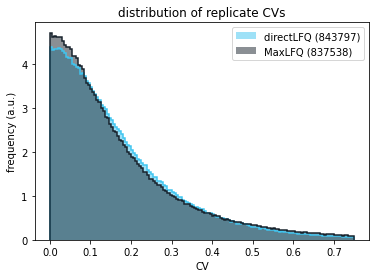

In [12]:
import matplotlib.pyplot as plt
ax = plt.subplot()
lfqbenchmark.CVDistributionPlotter(list_of_dataset_cv_infos=[cvinfo_directlfq, cvinfo_maxlfq], ax = ax,cumulative=False, density=True, bins=150)
ax.legend()
outfile = f"../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/twofilt_density_false_maxlfq_directlfq.pdf"

ax.set_title("distribution of replicate CVs")
ax.set_xlabel("CV")
ax.set_ylabel('frequency (a.u.)')
plt.savefig(outfile)
